In [1]:
pip install seaborn

  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)
  Using cached pandas-1.5.0-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached matplotlib-3.6.0-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached numpy-1.23.3-cp310-cp310-win_amd64.whl (14.6 MB)
  Using cached fonttools-4.37.4-py3-none-any.whl (960 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached Pillow-9.2.0-cp310-cp310-win_amd64.whl (3.3 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.0.5-cp310-cp310-win_amd64.whl (164 kB)
  Using cached pytz-2022.2.1-py2.py3-none-any.whl (500 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn


  Using cached scikit_learn-1.1.2-cp310-cp310-win_amd64.whl (7.4 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.9.1-cp310-cp310-win_amd64.whl (38.6 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [4]:
#PATH = 'covid_19_in_education.xlsx'
df = pd.read_csv('covid_19_in_education.csv')

In [5]:
df.head()

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,4.570000e+15,17-03-2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,Every day,Irregularly
1,6.440000e+15,29-03-2021,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,1,No,Irregularly
2,5.000000e+15,18-03-2021,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are not enough
3,5.520000e+15,24-03-2021,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are enough
4,5.030000e+15,18-03-2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,No,There are not enough


 ##                                                Preprocessing 

deleting unnecessary columns

In [6]:
print(df['geography'].unique())
print()
print(df['age'].unique())
print()
print(df['education'].unique())
print()
print(df['employment_status'].unique())

['Suburban/Peri-urban' 'City center or metropolitan area' 'Rural'
 'Not Available']

['Over 45 years old' '26 to 35 years old' '36 to 45 years old'
 '16 to 25 years old' 'Under 16' 'Not Available']

['University or college degree completed'
 'Technical school diploma or degree completed'
 'Some technical education (e.g polytechnic school)'
 'Some university or college' 'Secondary school/ high school completed'
 'Primary school completed' 'Some primary education'
 'Some secondary school / high school' 'Post-graduate education'
 'Prefer not to answer' 'No formal education' 'Not available'
 'College or university' 'Post graduate' 'Technical school'
 'Secondary/high school']

['I am unemployed'
 'I work full-time, either as an employee or self-employed'
 'I do housework, fulfilling domestic tasks, looking after children'
 'I work part-time, either as an employee or self-employed' 'I am retired'
 'I am a student and I work part-time' 'I am a student'
 'None of the above' 'I am doing communi

In [7]:
df = df.drop('submission_id', axis=1)
df = df.drop('submission_date', axis=1)
# # df = df.drop('Unnamed: 9', axis=1)

In [8]:
df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,Every day,Irregularly
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,1,No,Irregularly
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are not enough
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are enough
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,No,There are not enough


finding unique values in "age" column

In [9]:
n = len(pd.unique(df['age']))
print("No.of.unique values :",n)

No.of.unique values : 6


In [10]:
a = df['age'].unique()
print(sorted(a))

['16 to 25 years old', '26 to 35 years old', '36 to 45 years old', 'Not Available', 'Over 45 years old', 'Under 16']


In [11]:
df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,Every day,Irregularly
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,1,No,Irregularly
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are not enough
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are enough
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,No,There are not enough


In [12]:
#df['gender'] = int(df['gender'])
print (df.dtypes)

gender                                                            object
age                                                               object
geography                                                         object
financial_situation                                               object
education                                                         object
employment_status                                                 object
submission_state                                                  object
can_children_observe_deterioration_of_basic_services_of_school     int64
do_children_3_and_17_yrs_receive_regular_school_meals             object
are_there_teachers_at_scheduled_class_hours                       object
dtype: object


In [13]:
n = len(pd.unique(df['financial_situation']))
print("No.of.unique values :",n)

print()

a = df['financial_situation'].unique()
print(sorted(a))

No.of.unique values : 8

['I can afford food and regular expenses, but nothing else', 'I can afford food, but nothing else', 'I can afford food, regular expenses, and clothes, but nothing else', 'I can comfortably afford food, clothes, and furniture, and I have savings', 'I can comfortably afford food, clothes, and furniture, but I don’t have savings', 'I cannot afford enough food for my family', 'Not Available', 'Prefer not to answer']


In [14]:
n = len(pd.unique(df['gender']))
print("No.of.unique values :",n)

print()

a = df['gender'].unique()
print(sorted(a))

No.of.unique values : 5

['Female', 'Male', 'Non-Binary', 'Not Available', 'Prefer not to answer']


In [15]:
df = df.drop('can_children_observe_deterioration_of_basic_services_of_school', axis=1)
df = df.drop('do_children_3_and_17_yrs_receive_regular_school_meals', axis=1)
df = df.drop('are_there_teachers_at_scheduled_class_hours', axis=1)


In [16]:
print (df.dtypes)

gender                 object
age                    object
geography              object
financial_situation    object
education              object
employment_status      object
submission_state       object
dtype: object


In [17]:
final_data = pd.get_dummies(df, drop_first = True)

In [18]:
final_data.head()

,gender_Male,gender_Non-Binary,gender_Not Available,gender_Prefer not to answer,age_26 to 35 years old,age_36 to 45 years old,age_Not Available,age_Over 45 years old,age_Under 16,geography_Not Available,...,submission_state_Monagas,submission_state_Mérida,submission_state_Nueva Esparta,submission_state_Portuguesa,submission_state_Sucre,submission_state_Trujillo,submission_state_Táchira,submission_state_Vargas,submission_state_Yaracuy,submission_state_Zulia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
n = len(pd.unique(df['submission_state']))
print("No.of.unique values :",n)


No.of.unique values : 24


##  DATA VISUALIZATION

## Pair Plot

In [20]:
df.head()
from sklearn.preprocessing import LabelEncoder

In [21]:
nonlabled_df=df.copy()

In [22]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['gender']= label_encoder.fit_transform(df['gender']) 
print(df.head())

   gender                 age                         geography  \
0       0   Over 45 years old               Suburban/Peri-urban   
1       1  26 to 35 years old               Suburban/Peri-urban   
2       0  26 to 35 years old  City center or metropolitan area   
3       1  36 to 45 years old               Suburban/Peri-urban   
4       0   Over 45 years old               Suburban/Peri-urban   

                                 financial_situation  \
0  I can afford food and regular expenses, but no...   
1          I cannot afford enough food for my family   
2  I can comfortably afford food, clothes, and fu...   
3                I can afford food, but nothing else   
4  I can afford food and regular expenses, but no...   

                                education  \
0  University or college degree completed   
1  University or college degree completed   
2  University or college degree completed   
3  University or college degree completed   
4  University or college degree com

In [23]:
df['age']= label_encoder.fit_transform(df['age']) 
df['geography']= label_encoder.fit_transform(df['geography']) 
df['financial_situation']= label_encoder.fit_transform(df['financial_situation']) 
df['education']= label_encoder.fit_transform(df['education']) 
df['employment_status']= label_encoder.fit_transform(df['employment_status']) 
df['submission_state']= label_encoder.fit_transform(df['submission_state']) 

In [24]:
df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state
0,0,4,3,0,15,6,13
1,1,1,3,5,15,6,13
2,0,1,0,3,15,8,13
3,1,2,3,1,15,8,13
4,0,4,3,0,15,6,13


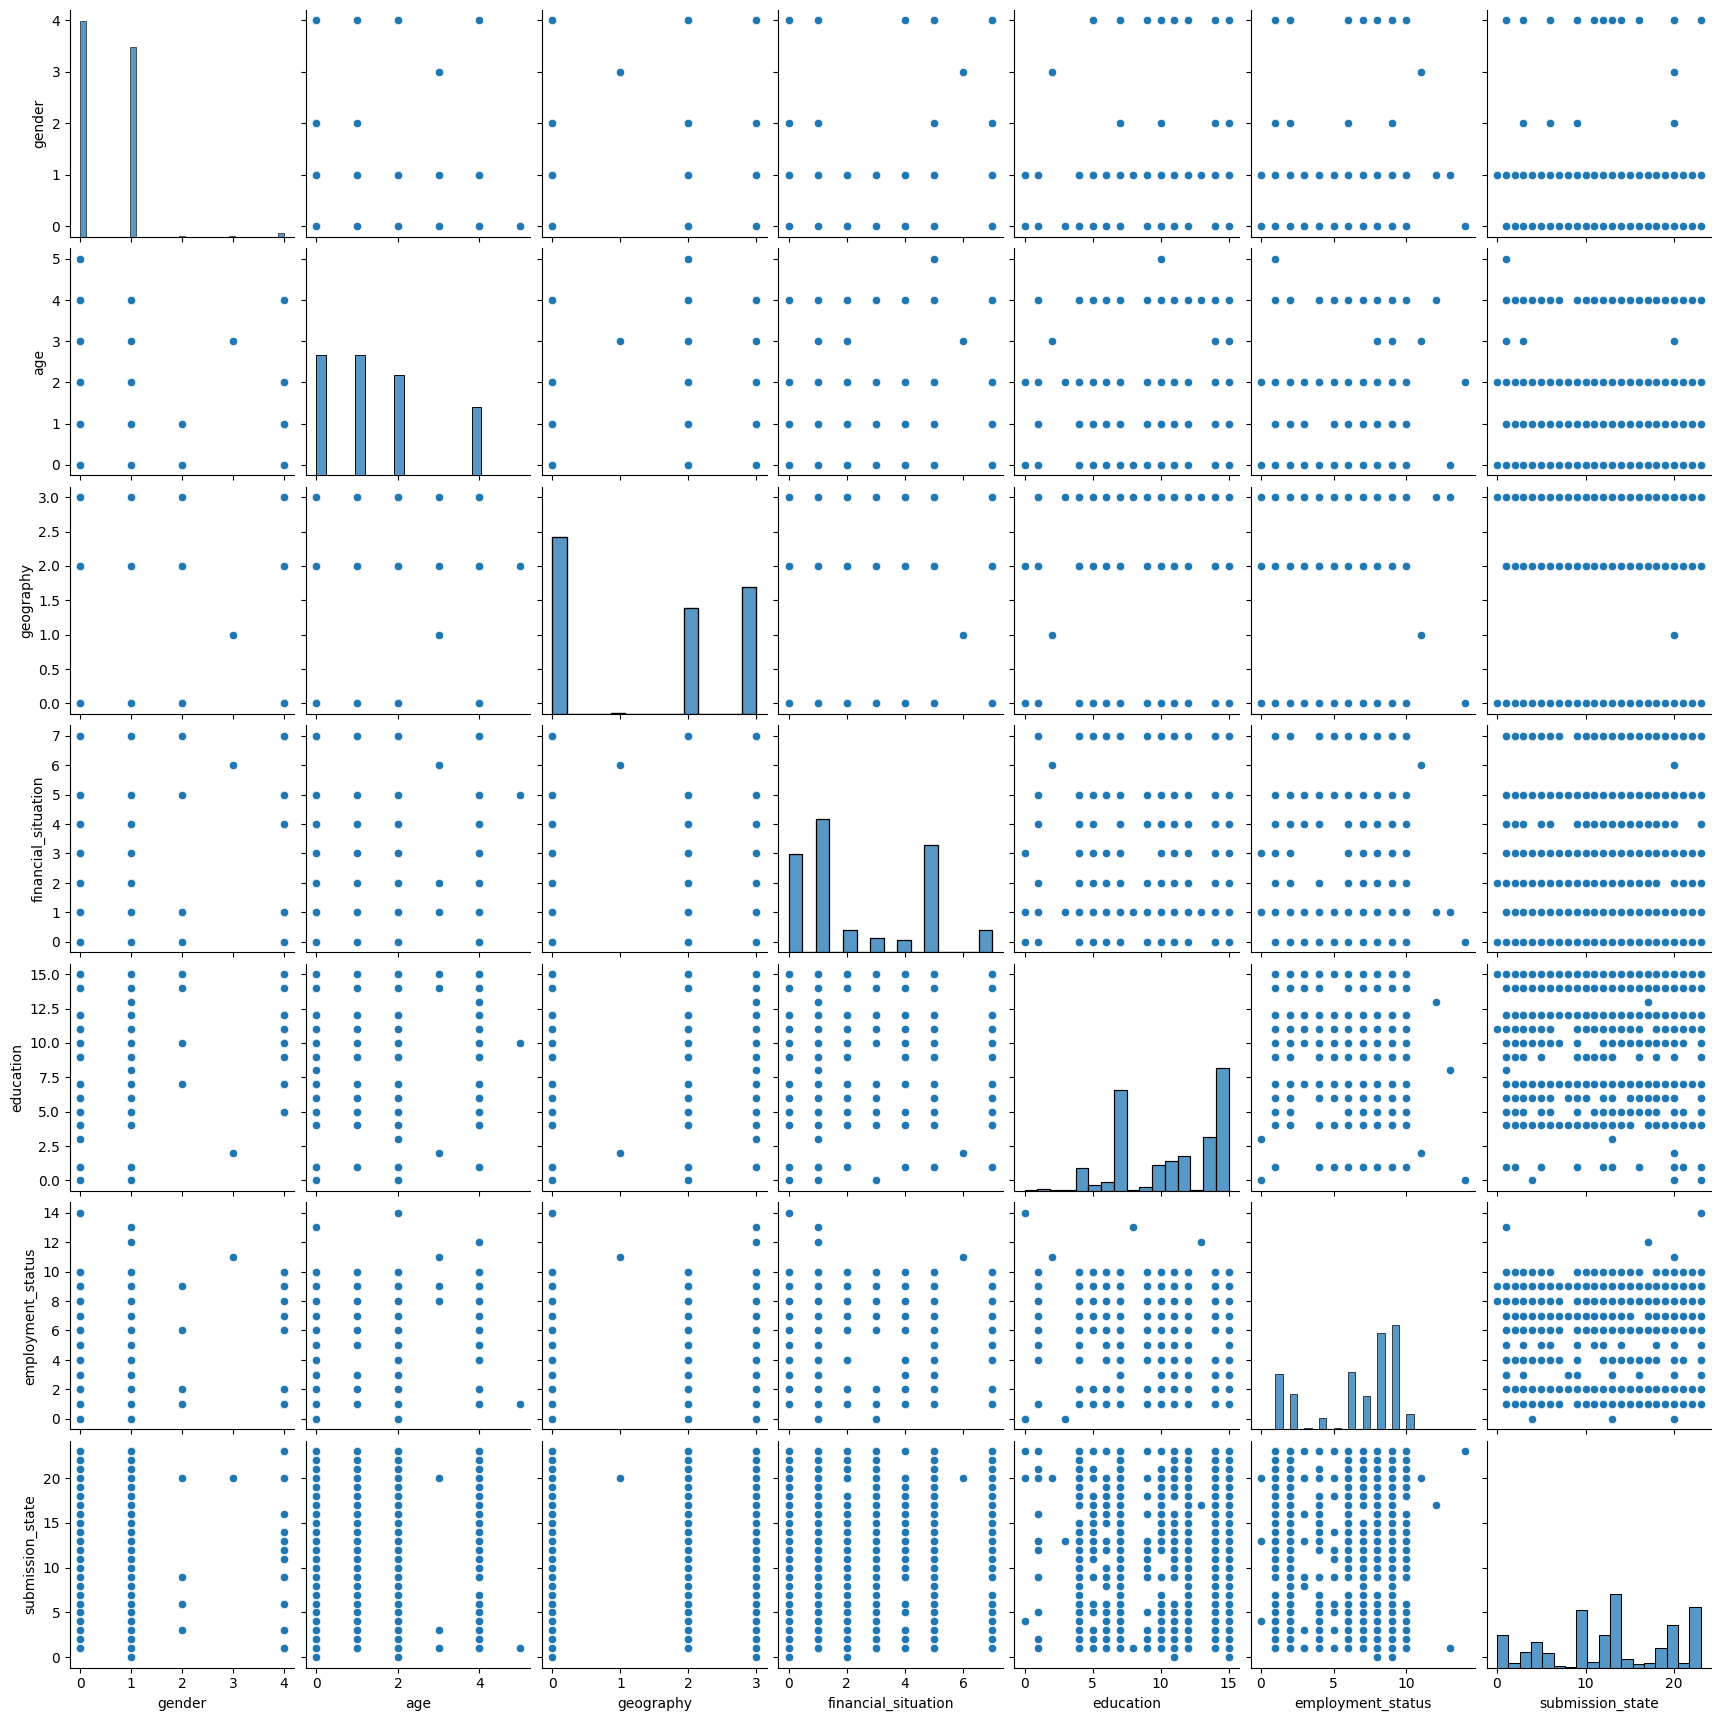

In [25]:
sns.pairplot(df)

## Heat Map

<AxesSubplot: >

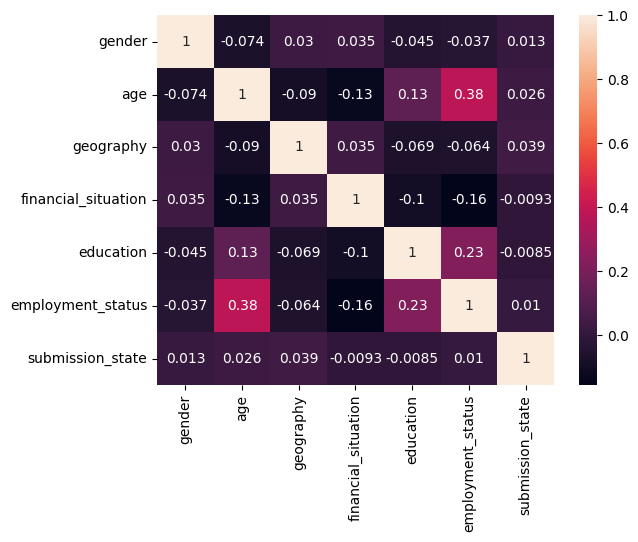

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
nonlabled_df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda


In [28]:
nonlabled_df['geography'].unique()

array(['Suburban/Peri-urban', 'City center or metropolitan area', 'Rural',
       'Not Available'], dtype=object)

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
labels = ['University or college degree completed','Secondary school/ high school completed','Technical school diploma or degree completed','Some university or college','Some technical education (e.g polytechnic school)','Post-graduate education','Some secondary school / high school','Primary school completed','Prefer not to answer','Some primary education','No formal education','Post graduate','Secondary/high school','Technical school']

In [32]:
nonlabled_df['geography'].unique()

array(['Suburban/Peri-urban', 'City center or metropolitan area', 'Rural',
       'Not Available'], dtype=object)

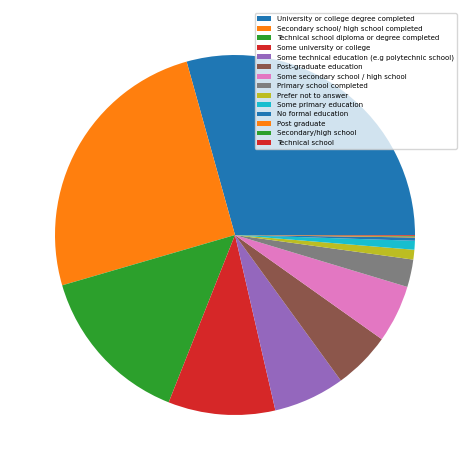

In [39]:
geo_data = nonlabled_df.loc[nonlabled_df['geography'] == 'Suburban/Peri-urban']
geo_data.head()
geo_data = geo_data[['education']]
plt.pie(geo_data.value_counts())
plt.legend(labels, loc="best",prop={'size': 5},)
plt.tight_layout()
plt.show()

In [36]:
nonlabled_df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda


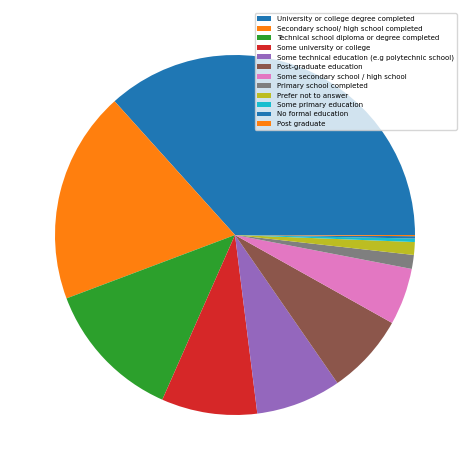

In [41]:
geo_data = nonlabled_df.loc[nonlabled_df['geography'] == 'City center or metropolitan area']
geo_data = geo_data[['education']]
plt.pie(geo_data.value_counts())
plt.legend(labels, loc="best",prop={'size': 5},)
plt.tight_layout()
plt.show()


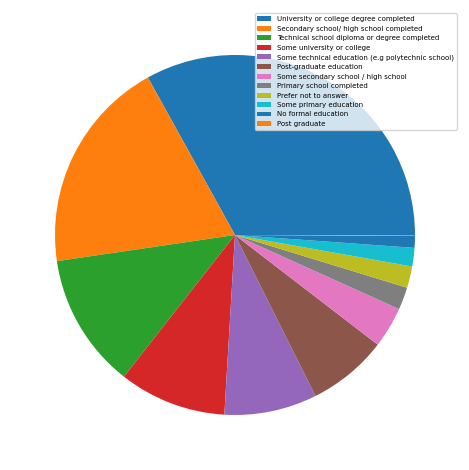

In [42]:
geo_data = nonlabled_df.loc[nonlabled_df['geography'] == 'Rural']
geo_data = geo_data[['education']]
plt.pie(geo_data.value_counts())
plt.legend(labels, loc="best",prop={'size': 5},)
plt.tight_layout()
plt.show()


In [43]:
df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state
0,0,4,3,0,15,6,13
1,1,1,3,5,15,6,13
2,0,1,0,3,15,8,13
3,1,2,3,1,15,8,13
4,0,4,3,0,15,6,13


In [45]:
# splittin the data into independent and dependent variables
df = df[['gender','age','geography','education','employment_status','submission_state','financial_situation']]

In [46]:
df.head()

,gender,age,geography,education,employment_status,submission_state,financial_situation
0,0,4,3,15,6,13,0
1,1,1,3,15,6,13,5
2,0,1,0,15,8,13,3
3,1,2,3,15,8,13,1
4,0,4,3,15,6,13,0


In [143]:
# splittin the data into independent and dependent variables
X= df[['employment_status','age']]
y = nonlabled_df['financial_situation']

In [144]:
y
X.head()

,employment_status,age
0,6,4
1,6,1
2,8,1
3,8,2
4,6,4


In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)


In [146]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [147]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,15,20,25,30,40,50,70,80],'max_iter':[100,200,300,400,500]}

In [148]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [149]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 15, 20, 25, 30, 40, 50, 70,
                               80],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [150]:
print(classifier_regressor.best_params_)

{'C': 40, 'max_iter': 200, 'penalty': 'l2'}


In [152]:
print(classifier_regressor.best_score_)

0.3303289755921335


In [93]:
X_train.head()

,gender,geography
1115,1,2
1886,1,0
2753,0,2
2168,0,3
3049,1,0
